## 4 Evaluation of model 


#### 4.2 ROC (reciever opertaing characteristics) curve and AUC score 

In [5]:
# get the data 

import pandas as pd
import numpy as np 
np.random.seed(1)

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

# split into X features and Y labels
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Split into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 

clf.fit(X_train, Y_train)

# predict the probability of a model 

preds = clf.predict_proba(X_test)
preds[:10]

array([[0.84, 0.16],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.85, 0.15],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.32, 0.68],
       [0.99, 0.01],
       [0.11, 0.89]])

In [7]:
# select probabilty value having truth value = 1 
preds_positive = preds[:,1]
preds_positive

array([0.16, 0.79, 0.19, 0.02, 0.15, 0.06, 0.07, 0.68, 0.01, 0.89, 0.64,
       0.4 , 0.87, 0.4 , 0.38, 0.74, 0.96, 0.16, 0.85, 0.66, 0.87, 0.11,
       0.63, 0.78, 0.88, 0.95, 0.03, 0.89, 0.76, 0.94, 1.  , 0.95, 0.79,
       0.63, 0.11, 0.66, 0.39, 0.31, 0.69, 0.24, 0.84, 0.09, 0.28, 0.03,
       0.48, 0.83, 0.1 , 0.46, 0.71, 0.57, 1.  , 0.72, 0.5 , 0.67, 0.93,
       0.9 , 0.54, 0.04, 0.69, 0.1 , 0.28])

In [10]:
# roc curve 

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(Y_test,preds_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03333333, 0.03333333, 0.06666667,
       0.06666667, 0.06666667, 0.16666667, 0.23333333, 0.23333333,
       0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.33333333,
       0.33333333, 0.4       , 0.4       , 0.46666667, 0.46666667,
       0.46666667, 0.5       , 0.56666667, 0.6       , 0.73333333,
       0.86666667, 0.93333333, 1.        ])

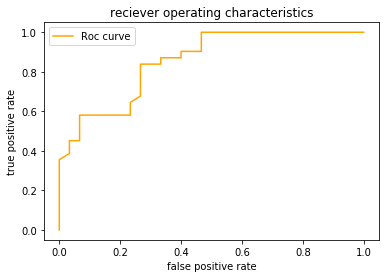

In [11]:
# plot a roc curve 

import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Draws a roc curve given false positive rate and true postive rate 
    """
    # plots the curve 
    plt.plot(fpr, tpr, color='orange', label="Roc curve")
    
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("reciever operating characteristics")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)
    

In [13]:
# calculate the auc score ie area under the curve

from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,preds_positive)

0.853763440860215

### confusion matrix 


In [17]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test,y_preds)

array([[22,  8],
       [ 5, 26]], dtype=int64)

In [20]:
pd.crosstab(Y_test,
            y_preds,
            rownames=['actual model'],
            colnames =['predicted model'])

predicted model,0,1
actual model,,
0,22,8
1,5,26


In [2]:
# ROC CURVE 

import pandas as pd 
import numpy as np 
np.random.seed(1)

import pandas as pd
import numpy as np 
np.random.seed(1)

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

# split into X features and Y labels
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

# choose a model 

from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# Split into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# fit the model 

clf.fit(X_train, Y_train)

# predict the probability of a model 

preds = clf.predict_proba(X_test)
preds[:10]

array([[0.84, 0.16],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.85, 0.15],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.32, 0.68],
       [0.99, 0.01],
       [0.11, 0.89]])

In [6]:
# calculate probablities with postive value ie values of index = 1

pred_positive = preds[:,1]
pred_positive[:10]

array([0.16, 0.79, 0.19, 0.02, 0.15, 0.06, 0.07, 0.68, 0.01, 0.89])

In [8]:
# ROC curve 

from sklearn.metrics import roc_curve 

fpr, tpr, thershold = roc_curve(Y_test, pred_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03333333, 0.03333333, 0.06666667,
       0.06666667, 0.06666667, 0.16666667, 0.23333333, 0.23333333,
       0.26666667, 0.26666667, 0.26666667, 0.26666667, 0.33333333,
       0.33333333, 0.4       , 0.4       , 0.46666667, 0.46666667,
       0.46666667, 0.5       , 0.56666667, 0.6       , 0.73333333,
       0.86666667, 0.93333333, 1.        ])

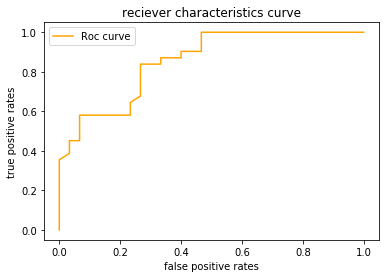

In [13]:
# draw a curve for better visulatizatin 
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    plot roc curve given false positive and true positive rate 
    """
    # plot the roc/area under curve 
    plt.plot(fpr, tpr, color = "orange" ,label ="Roc curve" )
    
    plt.xlabel("false positive rates")
    plt.ylabel("true positive rates")
    plt.title("reciever characteristics curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [18]:
# calculate auc score 

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, pred_positive)
auc_score 

0.853763440860215

it means 85% is under the curve 